# Modern Portfolio Theory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
hero=pd.read_csv('HEROMOTOCO.csv')
hero.Date=pd.to_datetime(hero['Date'])
hero=hero[hero['Series']=='EQ']
hero.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HEROMOTOCO,EQ,2017-05-15,3541.50,3541.0,3558.00,3504.60,3518.0,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38
1,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.5,3631.80,3491.10,3623.0,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64
2,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.0,3683.95,3595.05,3634.1,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54
3,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.0,3639.00,3577.05,3586.0,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78
4,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.0,3656.00,3533.75,3565.0,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86


In [3]:
hero.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.00000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,3380.030061,3385.91164,3416.863968,3343.728138,3377.351113,3377.943522,3380.096478,4.444292e+05,1.437064e+09,35108.186235,2.277516e+05,52.936741
std,421.260222,422.22426,421.089985,424.351558,422.553450,423.007897,422.890237,3.182689e+05,8.918668e+08,19028.835768,1.519030e+05,14.352500
min,2499.700000,2499.00000,2537.500000,2477.000000,2496.000000,2499.700000,2515.260000,2.421700e+04,9.053676e+07,2498.000000,6.959000e+03,8.370000
25%,3003.025000,3021.25000,3047.175000,2964.825000,2991.512500,2990.675000,3001.890000,2.541932e+05,8.874053e+08,22750.500000,1.296188e+05,43.565000
50%,3553.625000,3559.00000,3583.225000,3522.000000,3550.000000,3553.625000,3551.745000,3.524510e+05,1.186881e+09,31669.500000,1.867400e+05,52.930000
75%,3715.637500,3724.50000,3747.287500,3682.037500,3711.800000,3715.637500,3717.200000,5.260210e+05,1.746253e+09,42265.750000,2.910782e+05,64.350000
max,4048.950000,4084.00000,4091.950000,3995.000000,4036.050000,4048.950000,4046.970000,3.296513e+06,9.071020e+09,190938.000000,1.202023e+06,86.200000


In [4]:
hero['Daily_return']=hero['Close Price'].pct_change()
hero.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_return
count,494.000000,494.00000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000,493.000000
mean,3380.030061,3385.91164,3416.863968,3343.728138,3377.351113,3377.943522,3380.096478,4.444292e+05,1.437064e+09,35108.186235,2.277516e+05,52.936741,-0.000570
std,421.260222,422.22426,421.089985,424.351558,422.553450,423.007897,422.890237,3.182689e+05,8.918668e+08,19028.835768,1.519030e+05,14.352500,0.015064
min,2499.700000,2499.00000,2537.500000,2477.000000,2496.000000,2499.700000,2515.260000,2.421700e+04,9.053676e+07,2498.000000,6.959000e+03,8.370000,-0.062630
25%,3003.025000,3021.25000,3047.175000,2964.825000,2991.512500,2990.675000,3001.890000,2.541932e+05,8.874053e+08,22750.500000,1.296188e+05,43.565000,-0.008436
50%,3553.625000,3559.00000,3583.225000,3522.000000,3550.000000,3553.625000,3551.745000,3.524510e+05,1.186881e+09,31669.500000,1.867400e+05,52.930000,-0.001543
75%,3715.637500,3724.50000,3747.287500,3682.037500,3711.800000,3715.637500,3717.200000,5.260210e+05,1.746253e+09,42265.750000,2.910782e+05,64.350000,0.007022
max,4048.950000,4084.00000,4091.950000,3995.000000,4036.050000,4048.950000,4046.970000,3.296513e+06,9.071020e+09,190938.000000,1.202023e+06,86.200000,0.073949


In [5]:
hero.dropna()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_return
1,HEROMOTOCO,EQ,2017-05-16,3515.45,3529.50,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,0.029569
2,HEROMOTOCO,EQ,2017-05-17,3619.40,3615.00,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,0.007335
3,HEROMOTOCO,EQ,2017-05-18,3645.95,3600.00,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,-0.014784
4,HEROMOTOCO,EQ,2017-05-19,3592.05,3597.00,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,-0.005679
5,HEROMOTOCO,EQ,2017-05-22,3571.65,3596.75,3645.00,3550.95,3580.15,3562.45,3591.90,255829,9.189118e+08,22156,119621,46.76,-0.002576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HEROMOTOCO,EQ,2019-05-07,2531.30,2567.90,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,-0.001560
490,HEROMOTOCO,EQ,2019-05-08,2527.35,2525.80,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,-0.010940
491,HEROMOTOCO,EQ,2019-05-09,2499.70,2499.00,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,0.015222
492,HEROMOTOCO,EQ,2019-05-10,2537.75,2535.00,2560.00,2500.05,2506.05,2507.30,2529.09,332771,8.416086e+08,23272,118956,35.75,-0.011999


**mean daily return**

In [6]:
mean_daily_return=hero['Daily_return'].mean()
mean_daily_return

-0.0005696213914633644

**annual mean**

In [7]:
annual_mean=mean_daily_return * 252
annual_mean

-0.14354459064876784

**mean daily standard deviation**

In [8]:
daily_std_dev=hero['Daily_return'].std()
daily_std_dev

0.015064453115429437

**annual std dev**

In [9]:
import math
daily_std_dev * math.sqrt(252)

0.23914077948371096

# Task 5.2 #

In [10]:
itc=pd.read_csv('ITC.csv')
itc=itc[itc['Series']=='EQ']
itc['Daily_return']=itc['Close Price'].pct_change()
itc=itc.dropna()
itc.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_return
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,493.000000,4.930000e+02,493.000000,493.000000
mean,281.535497,281.965923,284.526673,279.022921,281.534381,281.558519,281.712069,1.209189e+07,3.422720e+09,100960.906694,7.583221e+06,62.882191,0.000182
std,17.727699,17.813784,18.335391,17.332597,17.744351,17.730403,17.669646,9.573906e+06,2.778171e+09,49553.915307,5.799691e+06,8.978578,0.014165
min,251.600000,250.000000,253.250000,250.000000,251.350000,251.600000,251.960000,9.571390e+05,2.678039e+08,10947.000000,5.829560e+05,34.830000,-0.124865
25%,267.600000,268.000000,270.600000,265.950000,267.750000,267.600000,267.870000,7.759828e+06,2.135987e+09,71545.000000,4.657058e+06,56.480000,-0.007428
50%,277.650000,278.950000,281.400000,275.250000,277.650000,277.650000,278.350000,9.841205e+06,2.753930e+09,92874.000000,6.339511e+06,63.290000,-0.000818
75%,293.400000,294.100000,295.700000,291.050000,293.200000,293.400000,293.190000,1.342587e+07,3.821533e+09,117503.000000,8.800195e+06,69.380000,0.007106
max,342.500000,346.000000,367.700000,340.300000,342.800000,342.500000,344.040000,1.494797e+08,4.254992e+10,667965.000000,8.629348e+07,86.810000,0.060797


In [11]:
axis_bank=pd.read_csv('AXISBANK.csv')
axis_bank=axis_bank[axis_bank['Series']=='EQ']
axis_bank['Daily_return']=axis_bank['Close Price'].pct_change()
axis_bank=axis_bank.dropna()
axis_bank.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_return
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,493.000000,4.930000e+02,493.000000,493.000000
mean,577.307809,578.040264,585.169067,570.460041,577.776673,577.778398,577.838458,8.746747e+06,5.116145e+09,109032.448276,4.198111e+06,47.724097,0.000925
std,78.706526,79.166998,79.734488,78.291041,78.944726,78.937190,78.982468,6.237278e+06,3.718319e+09,58819.418656,3.292623e+06,11.965349,0.017507
min,449.950000,451.650000,457.800000,447.500000,449.800000,449.950000,452.070000,1.245716e+06,6.359149e+08,7548.000000,3.689650e+05,11.200000,-0.094807
25%,516.550000,516.800000,522.500000,509.500000,516.300000,516.550000,516.840000,4.954888e+06,2.685185e+09,67406.000000,2.283479e+06,39.720000,-0.009971
50%,545.650000,546.500000,552.400000,538.050000,546.150000,545.900000,546.130000,7.130411e+06,4.228871e+09,96263.000000,3.247608e+06,46.780000,-0.000202
75%,620.050000,623.550000,628.650000,615.600000,621.350000,620.100000,621.490000,1.028207e+07,6.260657e+09,136098.000000,5.156937e+06,55.640000,0.009758
max,780.700000,780.950000,787.650000,769.000000,775.800000,780.700000,775.220000,5.885946e+07,3.249514e+10,471549.000000,2.551516e+07,86.320000,0.092051


In [12]:
rcom=pd.read_csv('RCOM.csv')
rcom=rcom[rcom['Series']=='EQ']
rcom['Daily_return']=rcom['Close Price'].pct_change()
rcom=rcom.dropna()
rcom['Daily_return'].head()

1    0.003125
2   -0.004673
3   -0.028169
4   -0.016103
5   -0.024550
Name: Daily_return, dtype: float64

In [13]:
dhfl=pd.read_csv('DHFL.csv')
dhfl=dhfl[dhfl['Series']=='EQ']
dhfl['Daily_return']=dhfl['Close Price'].pct_change()
dhfl=dhfl.dropna()
dhfl.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'Daily_return'],
      dtype='object')

In [14]:
voltas=pd.read_csv('VOLTAS.csv')
voltas=voltas[voltas['Series']=='EQ']
voltas['Daily_return']=voltas['Close Price'].pct_change()
voltas=voltas.dropna()
voltas.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'Daily_return'],
      dtype='object')

**Individual Annual Mean**

In [15]:
itc_mean = (itc['Daily_return'].mean())*252
axis_mean = (axis_bank['Daily_return'].mean())*252
rcom_mean = (rcom['Daily_return'].mean())*252
dhfl_mean = (dhfl['Daily_return'].mean())*252
voltas_mean = (voltas['Daily_return'].mean())*252

In [16]:
var=[itc_mean , axis_mean , rcom_mean , dhfl_mean , voltas_mean]
annual_mean=[]
for v in var:
    annual_mean.append(v)
np.array(annual_mean)

array([ 0.04592812,  0.23319431, -0.88172863, -0.44958148,  0.19103016])

**Annual Std Dev**

In [17]:
itc_std_dev = (itc['Daily_return'].std())*math.sqrt(252)
axis_std_dev = (axis_bank['Daily_return'].std())*math.sqrt(252)
rcom_std_dev = (rcom['Daily_return'].std())*math.sqrt(252)
dhfl_std_dev = (dhfl['Daily_return'].std())*math.sqrt(252)
voltas_std_dev = (voltas['Daily_return'].std())*math.sqrt(252)

In [18]:
annual_std=np.array([itc_std_dev , axis_std_dev ,rcom_std_dev , dhfl_std_dev ,voltas_std_dev])
annual_std

array([0.22485638, 0.27791735, 0.98536613, 0.66288009, 0.30834649])

In [19]:
data=[itc['Daily_return'],axis_bank['Daily_return'],rcom['Daily_return'],dhfl['Daily_return'],voltas['Daily_return']]
headers=['ITC','AXISBANK','RCOM','DHFL','VOLTAS']
df=pd.concat(data , axis=1,keys=headers)
df_2=df.dropna()
df_2##df['ITC'] = pd.DataFrame(itc['Daily_return'])
#df['AXISBANK'] = pd.DataFrame(axis_bank['Daily_return'])
#df['RCOM'] = pd.DataFrame(rcom['Daily_return'])
#df['ITC'] = pd.DataFrame(dhfl['Daily_return'])
#df['VOLTAS'] = pd.DataFrame(voltas['Daily_return'])

,ITC,AXISBANK,RCOM,DHFL,VOLTAS
10,0.021838,-0.008212,-0.203883,-0.016110,-0.027884
18,-0.002082,0.003014,-0.031008,0.010720,0.009105
27,0.000810,-0.008010,0.034121,-0.025758,-0.005416
32,0.010540,0.040854,0.055156,-0.032899,0.008447
39,-0.002991,0.013515,0.067982,-0.000495,0.000965
...,...,...,...,...,...
458,-0.015905,0.022446,-0.090909,-0.050251,0.007083
466,-0.001022,0.028184,-0.045977,0.025717,0.005030
476,-0.005400,-0.011237,-0.035714,0.052663,0.005510
484,0.010053,-0.015873,-0.050000,0.023362,-0.010802


In [20]:
df_2.describe()

,ITC,AXISBANK,RCOM,DHFL,VOLTAS
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,-0.001023,0.005504,-0.004839,0.000791,0.000271
std,0.013210,0.021499,0.055548,0.020307,0.019626
min,-0.042968,-0.029200,-0.203883,-0.050251,-0.061937
25%,-0.008462,-0.008161,-0.030783,-0.010837,-0.011853
50%,-0.001219,0.003063,-0.007767,0.001602,0.000149
75%,0.004032,0.011827,0.018581,0.013980,0.011106
max,0.037044,0.092051,0.120332,0.052663,0.053328


In [21]:
cov_mat=df_2.cov()
cov_mat

,ITC,AXISBANK,RCOM,DHFL,VOLTAS
ITC,0.000174,0.000011,-0.000012,-0.000022,0.000047
AXISBANK,0.000011,0.000462,0.000407,0.000040,0.000177
RCOM,-0.000012,0.000407,0.003086,0.000092,0.000327
DHFL,-0.000022,0.000040,0.000092,0.000412,-0.000042
VOLTAS,0.000047,0.000177,0.000327,-0.000042,0.000385


**Portfolio Annual Mean**

In [22]:
0.2 * ( itc_mean + axis_mean + rcom_mean + dhfl_mean + voltas_mean)

-0.17223150274656393

**Portfolio Weights**

In [23]:
weight=np.array([0.2 , 0.2 , 0.2 , 0.2 , 0.2])
weight

array([0.2, 0.2, 0.2, 0.2, 0.2])

**Portfolio Variance on daily_returns**

In [24]:
var_daily= np.dot(weight.T , np.dot(cov_mat,weight))
var_daily

0.000262823086816008

In [25]:
std_daily=math.sqrt(var_daily)
std_daily

0.01621181935551985

**Portfolio Standard Deviation**

In [26]:
std_daily * math.sqrt(252)

0.25735465388765366

## Task 5.3
### Monte Carlo Simulation for portfolio Optimization

In [27]:
mean_returns=df_2.mean()
cov_matrix=df_2.cov()
print(mean_returns)
print(cov_matrix)

ITC        -0.001023
AXISBANK    0.005504
RCOM       -0.004839
DHFL        0.000791
VOLTAS      0.000271
dtype: float64
               ITC  AXISBANK      RCOM      DHFL    VOLTAS
ITC       0.000174  0.000011 -0.000012 -0.000022  0.000047
AXISBANK  0.000011  0.000462  0.000407  0.000040  0.000177
RCOM     -0.000012  0.000407  0.003086  0.000092  0.000327
DHFL     -0.000022  0.000040  0.000092  0.000412 -0.000042
VOLTAS    0.000047  0.000177  0.000327 -0.000042  0.000385


In [29]:
#Setting the number of iterations to 50000 and defining an array to hold the simulation results; initially set to all zeros
num_iterations = 50000
simulation_res = np.zeros((8,num_iterations))

for i in range(num_iterations):
    # generating random weights and normalizing their sum to 1
    weights=np.array(np.random.random(5))
    weights /= np.sum(weights)
    
    # calculating returns and std deviation for each iterations
    portfolio_return=np.sum(mean_returns * weights)
    portfolio_std_dev=np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
    
    #Storing each result in defined array
    simulation_res[0,i]=portfolio_return
    simulation_res[1,i]=portfolio_std_dev
    
    #Now sharpe ratio
    simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
    
    #Save the weights in the array
    for j in range(len(weights)):
        simulation_res[j+3,i] = weights[j]
    

In [30]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['return','stdev','sharpe_ratio','ITC','AXISBANK','RCOM','DHFL','VOLTAS'])
print(sim_frame.head(5))
print(sim_frame.tail(5))

     return     stdev  sharpe_ratio       ITC  AXISBANK      RCOM      DHFL  \
0  0.000563  0.013936      0.040381  0.255996  0.237950  0.149366  0.271569   
1  0.000067  0.012865      0.005206  0.332031  0.144147  0.116090  0.124592   
2  0.000977  0.010160      0.096129  0.384226  0.199226  0.004135  0.349208   
3  0.001628  0.016249      0.100215  0.066900  0.372902  0.141543  0.415233   
4 -0.000193  0.013478     -0.014287  0.449775  0.165648  0.167487  0.207112   

     VOLTAS  
0  0.085118  
1  0.283140  
2  0.063206  
3  0.003422  
4  0.009977  
         return     stdev  sharpe_ratio       ITC  AXISBANK      RCOM  \
49995  0.001536  0.012465      0.123239  0.206431  0.317059  0.061679   
49996  0.000531  0.014792      0.035898  0.168729  0.216323  0.147592   
49997  0.000859  0.013289      0.064605  0.284469  0.266776  0.094853   
49998  0.000816  0.012772      0.063902  0.392301  0.300195  0.116389   
49999 -0.000821  0.020835     -0.039385  0.232429  0.138788  0.324204   

  

In [31]:
#Spotting the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe_ratio'].idxmax()]

#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 return          0.004772
stdev           0.019396
sharpe_ratio    0.246042
ITC             0.040277
AXISBANK        0.876054
RCOM            0.011076
DHFL            0.049177
VOLTAS          0.023415
Name: 19336, dtype: float64
The portfolio for min risk:
 return          0.000388
stdev           0.009508
sharpe_ratio    0.040778
ITC             0.516339
AXISBANK        0.132535
RCOM            0.006268
DHFL            0.237667
VOLTAS          0.107191
Name: 43137, dtype: float64


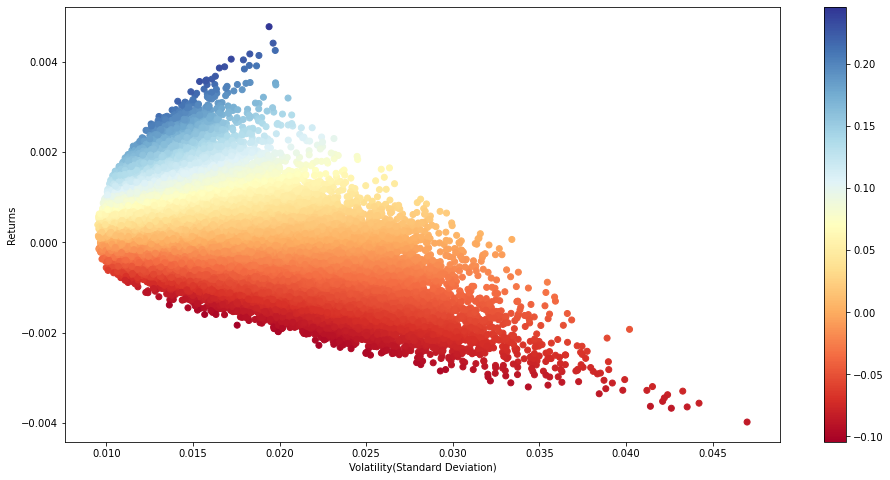

In [32]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.figure(figsize=(16,8))
plt.scatter(sim_frame.stdev,sim_frame['return'], c=sim_frame.sharpe_ratio,cmap='RdYlBu')
plt.xlabel('Volatility(Standard Deviation)')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

# Task 5.4

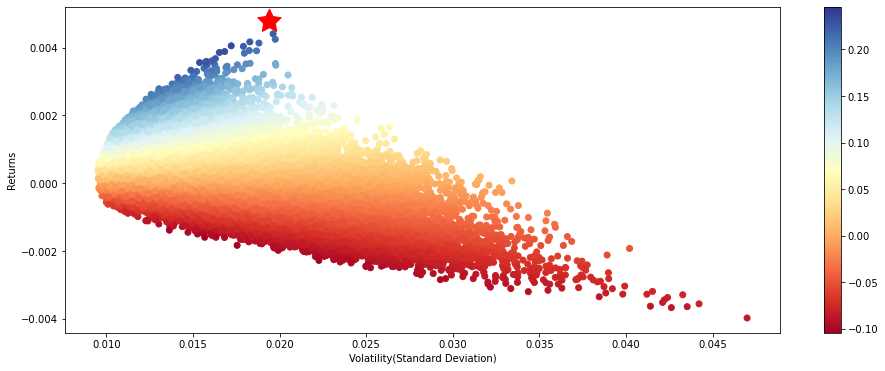

In [33]:
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.figure(figsize=(16,6))
plt.scatter(sim_frame.stdev,sim_frame['return'], c=sim_frame.sharpe_ratio,cmap='RdYlBu')
plt.xlabel('Volatility(Standard Deviation)')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)

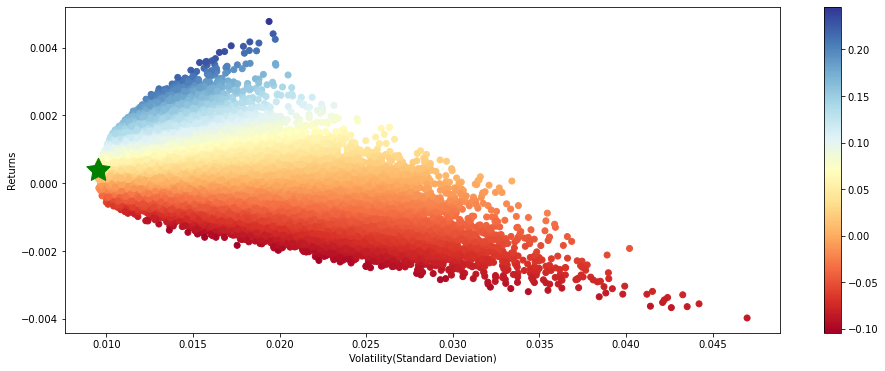

In [39]:
#Plot a green star to highlight position of the portfolio with minimum Variance
plt.figure(figsize=(16,6))
plt.scatter(sim_frame.stdev,sim_frame['return'], c=sim_frame.sharpe_ratio,cmap='RdYlBu')
plt.xlabel('Volatility(Standard Deviation)')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='g',s=600)
plt.show()

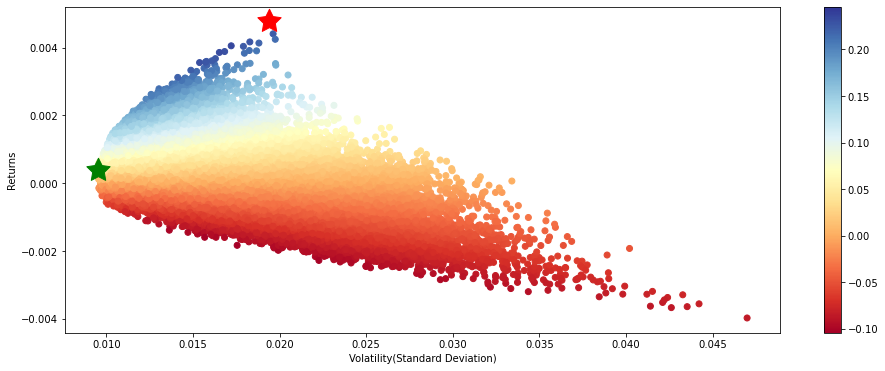

In [40]:
plt.figure(figsize=(16,6))
plt.scatter(sim_frame.stdev,sim_frame['return'], c=sim_frame.sharpe_ratio,cmap='RdYlBu')
plt.xlabel('Volatility(Standard Deviation)')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='g',s=600)
plt.show()